# 90Prime data


## Testing for bias drift



In [1]:
import os
import ccdproc
from astropy.io import fits
from astropy.time import Time

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/home/rfinn/github/HalphaImaging/notebooks'

In [11]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/BIAS/RAWDATA/')

In [12]:
!ls

ut20220423.0169.fits  ut20220423.0218.fits  ut20220423.0267.fits
ut20220423.0170.fits  ut20220423.0219.fits  ut20220423.0268.fits
ut20220423.0171.fits  ut20220423.0220.fits  ut20220423.ZERO.0000.fits
ut20220423.0172.fits  ut20220423.0221.fits  ut20220423.ZERO.0001.fits
ut20220423.0173.fits  ut20220423.0222.fits  ut20220423.ZERO.0002.fits
ut20220423.0174.fits  ut20220423.0223.fits  ut20220423.ZERO.0003.fits
ut20220423.0175.fits  ut20220423.0224.fits  ut20220423.ZERO.0004.fits
ut20220423.0176.fits  ut20220423.0225.fits  ut20220423.ZERO.0045.fits
ut20220423.0177.fits  ut20220423.0226.fits  ut20220423.ZERO.0046.fits
ut20220423.0178.fits  ut20220423.0227.fits  ut20220423.ZERO.0047.fits
ut20220423.0179.fits  ut20220423.0228.fits  ut20220423.ZERO.0048.fits
ut20220423.0180.fits  ut20220423.0229.fits  ut20220423.ZERO.0049.fits
ut20220423.0181.fits  ut20220423.0230.fits  ut20220423.ZERO.0050.fits
ut20220423.0182.fits  ut20220423.0231.fits  ut20220423.ZERO.0051.fits
ut20220423.0183.fits  ut202204

In [14]:
ic = ccdproc.ImageFileCollection(os.getcwd(),glob_include="*.fits")

In [17]:
bias = ic.files_filtered(imagetyp = "zero")

In [21]:
t = fits.open(bias[0])

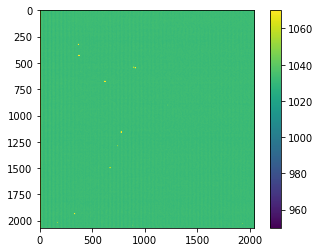

In [38]:
plt.imshow(t[1].data,vmin=950,vmax=1070)
plt.colorbar()

In [41]:
np.median(t[1].data)

1032.0

In [42]:
t[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                   16 / Number of extensions                           
DETSIZE = '[1:8064,1:8192]'    / Detector size                                  
CCDSUM  = '1 1     '           / CCD pixel summing                              
CCDBIN1 =                    1 / Binning factor along axis 1                    
CCDBIN2 =                    1 / Binning factor along axis 2                    
FILENAME= 'TempImage2402.fits' / base filename at acquisition                   
NCCDS   =                    4 / Number of CCDs                                 
NAMPS   =                   16 / Number of amplifiers                           
COMMENT ====================

In [48]:
test_time = t[0].header['TIME-OBS']
test_date = t[0].header['DATE-OBS']
print(test_date+" "+test_time)
newtime = test_date+" "+test_time

2022-04-23 12:27:42.889


In [49]:
mytime = Time(newtime)

In [52]:
mytime.mjd

59692.519246400465

In [ ]:
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

10


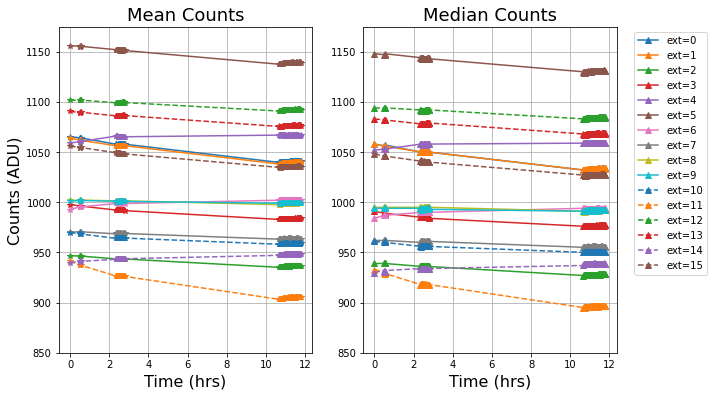

In [120]:
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(len(mycolors))

delta_time = (time - np.min(time)).value*24
# sort data points by time
isorted = np.argsort(delta_time)

plt.figure(figsize=(10,6))


for i in range(nextension):
    if i >= len(mycolors):
        myls='--'
    else:
        myls='-'
    plt.subplot(1,2,1)
    plt.plot(delta_time[isorted],bias_mean[:,i][isorted],label=f"ext={i}",marker='*',ls=myls)
    plt.subplot(1,2,2)
    plt.plot(delta_time[isorted],bias_median[:,i][isorted],label=f"ext={i}",marker='^',ls=myls)

plt.subplot(1,2,1)
plt.title("Mean Counts",fontsize=18)
#plt.legend()
plt.grid()
plt.ylabel("Counts (ADU)",fontsize=16)
plt.ylim(850,1175)
plt.xlabel("Time (hrs)",fontsize=16)

plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1.05, 1),ncol=1)
plt.grid()
plt.xlabel("Time (hrs)",fontsize=16)
plt.title("Median Counts",fontsize=18)
plt.ylim(850,1175)
plt.savefig('bias_vs_time.png')

10


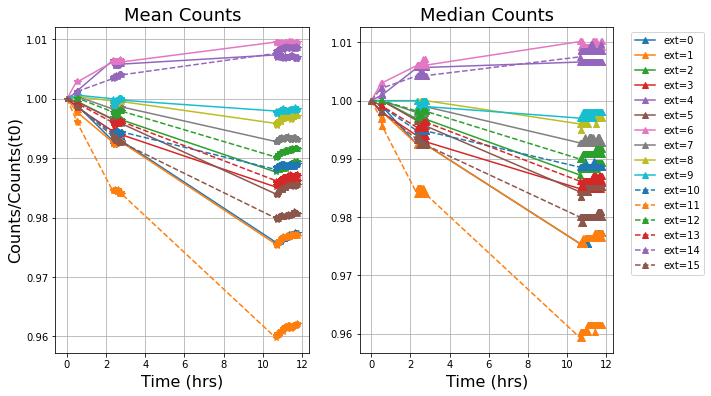

In [118]:
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(len(mycolors))
delta_time = (time - np.min(time)).value*24

# sort data points by time
isorted = np.argsort(delta_time)

plt.figure(figsize=(10,6))


for i in range(nextension):
    if i >= len(mycolors):
        myls='--'
    else:
        myls='-'
    plt.subplot(1,2,1)
    plt.plot(delta_time[isorted],bias_mean[:,i][isorted]/bias_mean[:,i][isorted][0],label=f"ext={i}",marker='*',ls=myls)
    plt.subplot(1,2,2)
    plt.plot(delta_time[isorted],bias_median[:,i][isorted]/bias_median[:,i][isorted][0],label=f"ext={i}",marker='^',ls=myls)

plt.subplot(1,2,1)
plt.title("Mean Counts",fontsize=18)
#plt.legend()
plt.grid()
plt.ylabel("Counts/Counts(t0)",fontsize=16)
#plt.ylim(850,1175)
plt.xlabel("Time (hrs)",fontsize=16)

plt.subplot(1,2,2)
plt.legend(bbox_to_anchor=(1.05, 1),ncol=1)
plt.grid()
plt.xlabel("Time (hrs)",fontsize=16)
plt.title("Median Counts",fontsize=18)
#plt.ylim(850,1175)
plt.savefig('bias_vs_time_normed.png')

Parsing 30 files
0 ut20220425.0060.fits
1 ut20220425.0061.fits
2 ut20220425.0062.fits
3 ut20220425.0063.fits
4 ut20220425.0064.fits
5 ut20220425.0065.fits
6 ut20220425.0066.fits
7 ut20220425.0067.fits
8 ut20220425.0068.fits
9 ut20220425.0069.fits
10 ut20220425.0070.fits
11 ut20220425.0071.fits
12 ut20220425.0072.fits
13 ut20220425.0073.fits
14 ut20220425.0074.fits
15 ut20220425.0075.fits
16 ut20220425.0076.fits
17 ut20220425.0077.fits
18 ut20220425.0078.fits
19 ut20220425.0079.fits
20 ut20220425.0080.fits
21 ut20220425.0081.fits
22 ut20220425.0082.fits
23 ut20220425.0083.fits
24 ut20220425.0084.fits
25 ut20220425.0085.fits
26 ut20220425.0086.fits
27 ut20220425.0087.fits
28 ut20220425.0088.fits
29 ut20220425.0089.fits
10
10


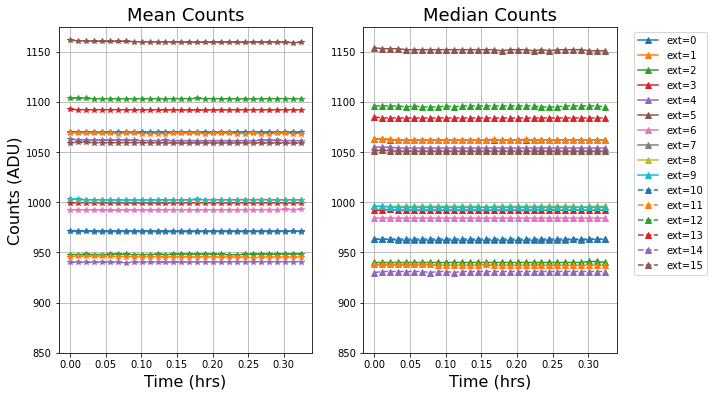

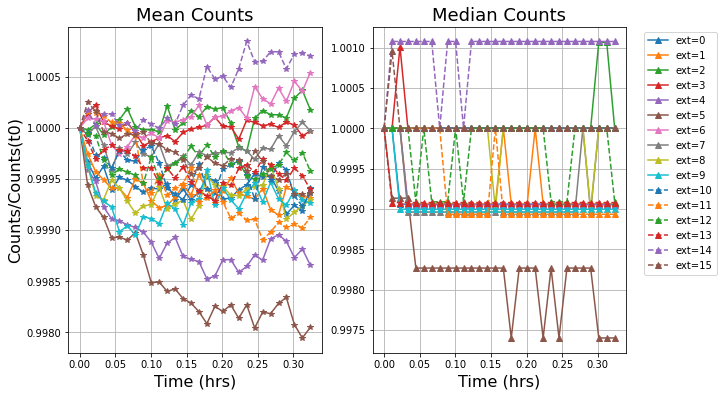

In [122]:
os.chdir("/media/rfinn/hdata/BOK2022Apr/20220425/BIAS")
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

Parsing 300 files
0 ut20220428.0000.fits
1 ut20220428.0001.fits
2 ut20220428.0002.fits
3 ut20220428.0003.fits
4 ut20220428.0004.fits
5 ut20220428.0005.fits
6 ut20220428.0006.fits
7 ut20220428.0007.fits
8 ut20220428.0008.fits
9 ut20220428.0009.fits
10 ut20220428.0010.fits
11 ut20220428.0011.fits
12 ut20220428.0012.fits
13 ut20220428.0013.fits
14 ut20220428.0014.fits
15 ut20220428.0015.fits
16 ut20220428.0016.fits
17 ut20220428.0017.fits
18 ut20220428.0018.fits
19 ut20220428.0019.fits
20 ut20220428.0020.fits
21 ut20220428.0021.fits
22 ut20220428.0022.fits
23 ut20220428.0023.fits
24 ut20220428.0024.fits
25 ut20220428.0025.fits
26 ut20220428.0026.fits
27 ut20220428.0027.fits
28 ut20220428.0028.fits
29 ut20220428.0029.fits
30 ut20220428.0287.fits
31 ut20220428.0288.fits
32 ut20220428.0289.fits
33 ut20220428.0290.fits
34 ut20220428.0291.fits
35 ut20220428.0292.fits
36 ut20220428.0293.fits
37 ut20220428.0294.fits
38 ut20220428.0295.fits
39 ut20220428.0296.fits
40 ut20220428.0297.fits
41 ut202

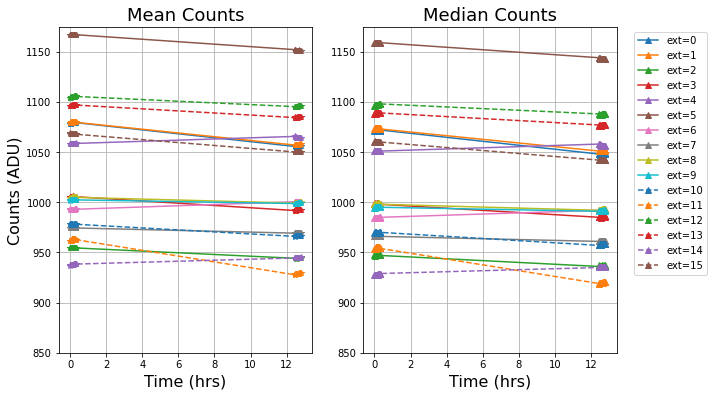

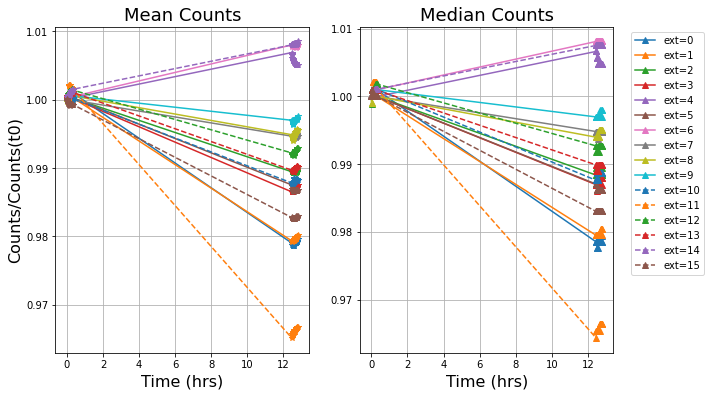

In [123]:
os.chdir("/media/rfinn/hdata/BOK2022Apr/20220428/")
%run ~/github/HalphaImaging/python3/BOK_bias_stability.py

In [144]:
hdu[1].data[100:200,100:200]

array([[1046, 1055, 1039, ..., 1057, 1053, 1044],
       [1053, 1061, 1048, ..., 1053, 1054, 1053],
       [1051, 1044, 1052, ..., 1046, 1055, 1047],
       ...,
       [1042, 1053, 1039, ..., 1056, 1050, 1051],
       [1056, 1058, 1052, ..., 1043, 1044, 1048],
       [1043, 1048, 1040, ..., 1050, 1055, 1056]], dtype=uint16)

In [346]:
hdu[0].shape

(2046, 2014)

## Measuring Gain

$$ \sigma = \sqrt{N_e} $$

$$ \sigma = \sqrt{gain \times N_{ADU}} $$


$$ \sigma^2 = {gain \times N_{ADU}} $$

Make a plot of $\sigma^2$ vs $N_{ADU}$.  The slope is the gain.

In [351]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-r')
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py

Parsing 320 files
processing extensions from 90Prime.r.2022-04-23T03:30:23.492
ext10: size of ccd is 2046x2014
ext11: size of ccd is 2046x2014
ext12: size of ccd is 2046x2014
ext13: size of ccd is 2046x2014
ext14: size of ccd is 2046x2014
ext15: size of ccd is 2046x2014
ext16: size of ccd is 2046x2014
ext1: size of ccd is 2046x2014
ext2: size of ccd is 2046x2014
ext3: size of ccd is 2046x2014
ext4: size of ccd is 2046x2014
ext5: size of ccd is 2046x2014
ext6: size of ccd is 2046x2014
ext7: size of ccd is 2046x2014
ext8: size of ccd is 2046x2014
ext9: size of ccd is 2046x2014
processing extensions from 90Prime.r.2022-04-23T03:31:08.584
processing extensions from 90Prime.r.2022-04-23T03:31:53.561
processing extensions from 90Prime.r.2022-04-23T03:32:38.527
processing extensions from 90Prime.r.2022-04-23T03:33:23.620
processing extensions from 90Prime.r.2022-04-23T03:34:08.548
processing extensions from 90Prime.r.2022-04-23T03:34:53.581
processing extensions from 90Prime.r.2022-04-23T03:3

<Figure size 432x288 with 0 Axes>

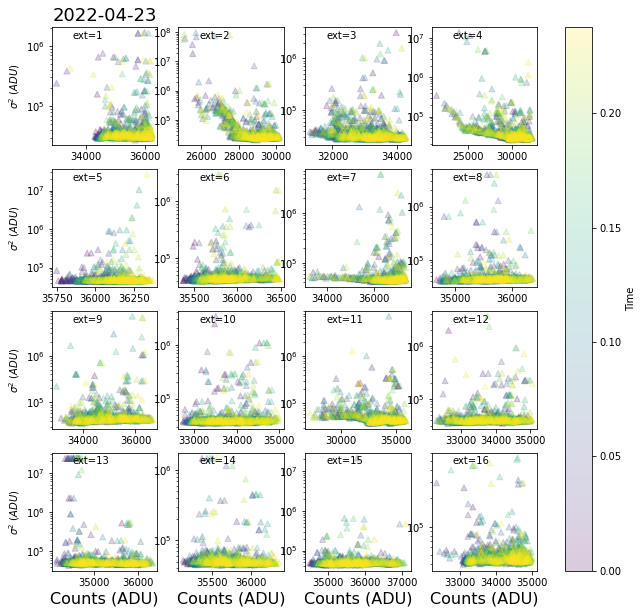

In [342]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23")

got here. now making hists...


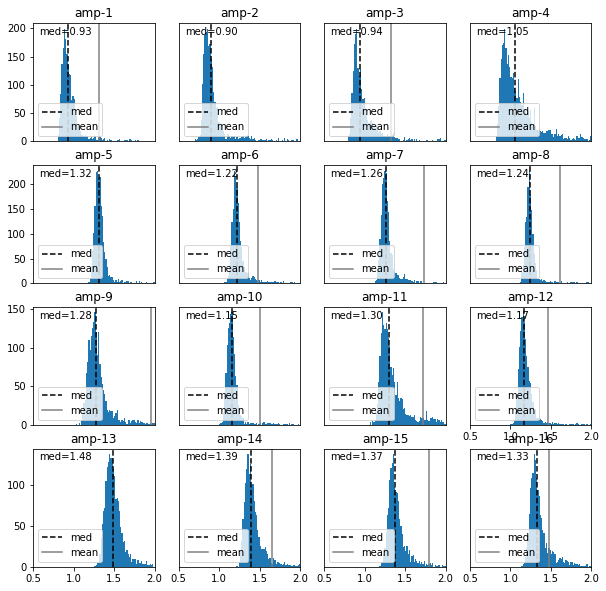

In [343]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

In [285]:
!gethead GAINCORR *_?.fits

FLAT-r_1.fits 9.596297E-01
FLAT-r_2.fits 7.921672E-01
FLAT-r_3.fits 8.966700E-01
FLAT-r_4.fits 8.348300E-01
FLAT-r_5.fits 9.764166E-01
FLAT-r_6.fits 9.683520E-01
FLAT-r_7.fits 1.000000
FLAT-r_8.fits 9.637906E-01
FLAT-r_9.fits 9.505100E-01


### Testing on combined flat images - DOES NOT WORK

On 2022-04-23, we have 20 r-band flats.

$$ \sigma = \sqrt{N_e} $$

$$ \sigma = \sqrt{gain \times N_{ADU}} $$


$$ \sigma^2 = \sum_0^i {gain \times N_{ADU}} = i \times  {gain \times N_{ADU}}$$

Make a plot of $\sigma^2$ vs $N_{ADU}$.  The slope is the $i \times gain = 20 \times gain$.

Images are also normalized, so this probably won't work right.

Moving on...

In [294]:
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py --comb --ncomb 20

Parsing 16 files
processing extensions from FLAT-r
10
CPU times: user 572 ms, sys: 16 ms, total: 588 ms
Wall time: 586 ms


<Figure size 432x288 with 0 Axes>

In [ ]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23")

In [ ]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23")

In [310]:
r = fstd**2/fmedian
for i in range(len(r[0])):
    print(f"mean gain = {np.mean(r[0][i]):.2e}")

mean gain = 1.01e-05
mean gain = 1.32e-03
mean gain = 1.45e-05
mean gain = 5.05e-05
mean gain = 2.87e-05
mean gain = 2.53e-05
mean gain = 2.85e-05
mean gain = 2.71e-05
mean gain = 2.31e-05
mean gain = 2.44e-05
mean gain = 2.62e-05
mean gain = 2.24e-05
mean gain = 2.54e-04
mean gain = 3.07e-05
mean gain = 2.63e-05
mean gain = 2.59e-05


In [303]:
len(r[0])

16

## Checking another day

But first need to run BIAS and FLAT corrections on all days!!!


In [311]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-Ha4nm')

In [338]:
%time %run ~/github/HalphaImaging/python3/BOK_measure_gain.py 

Parsing 320 files
processing extensions from 90Prime.Ha4nm.2022-04-23T03:00:29.665
processing extensions from 90Prime.Ha4nm.2022-04-23T03:01:51.098
processing extensions from 90Prime.Ha4nm.2022-04-23T03:03:12.673
processing extensions from 90Prime.Ha4nm.2022-04-23T03:04:34.192
processing extensions from 90Prime.Ha4nm.2022-04-23T03:05:55.801
processing extensions from 90Prime.Ha4nm.2022-04-23T03:07:17.307
processing extensions from 90Prime.Ha4nm.2022-04-23T03:08:38.878
processing extensions from 90Prime.Ha4nm.2022-04-23T03:10:00.385
processing extensions from 90Prime.Ha4nm.2022-04-23T03:11:21.751
processing extensions from 90Prime.Ha4nm.2022-04-23T03:12:43.312
processing extensions from 90Prime.Ha4nm.2022-04-23T03:14:04.864
processing extensions from 90Prime.Ha4nm.2022-04-23T03:15:26.279
processing extensions from 90Prime.Ha4nm.2022-04-23T03:16:47.786
processing extensions from 90Prime.Ha4nm.2022-04-23T03:18:09.395
processing extensions from 90Prime.Ha4nm.2022-04-23T03:19:31.095
process

<Figure size 432x288 with 0 Axes>

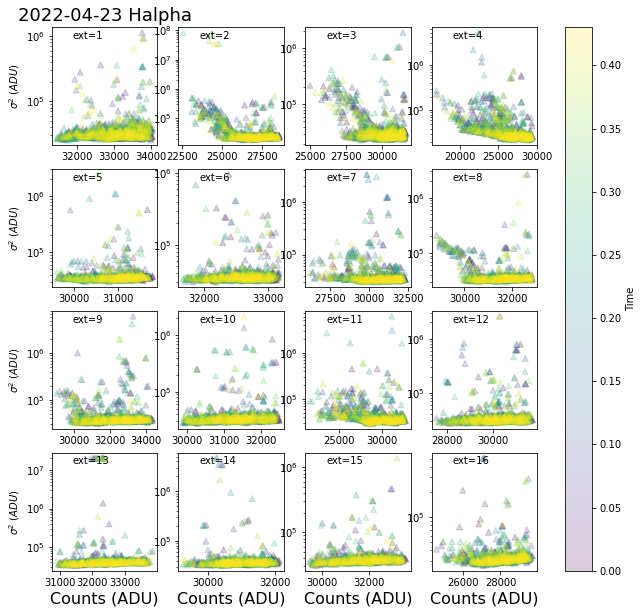

In [339]:
plot_gain(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

got here. now making hists...


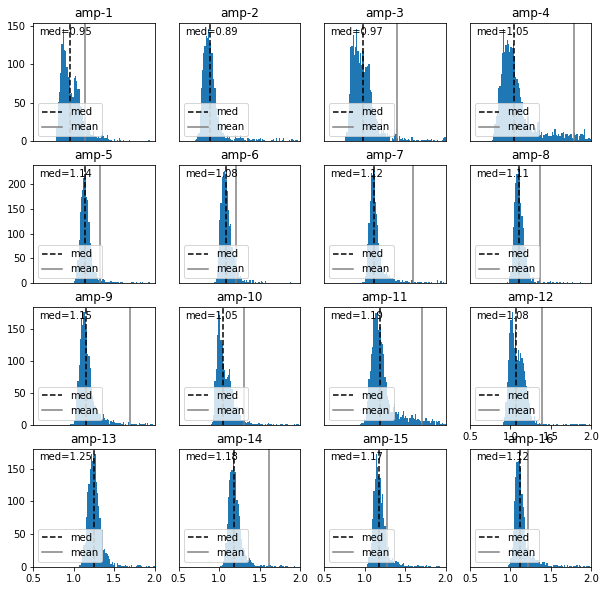

In [340]:
plot_gain_hists(fmedian,fstd,delta_time,title="2022-04-23 Halpha")

In [ ]:
allgains = []
allax = []    
for i in range(nextension):
    allgains.append([std[:,i,:].flatten()**2/counts[:,i,:].flatten()])  

In [319]:
g = fstd**2/fmedian

In [322]:
allgains = []
for i in range(16):
    allgains.append(g[:,i,:].flatten())

In [323]:
len(allgains)

16

In [347]:
pwd

'/media/rfinn/hdata/BOK2022Apr/20220423/FLAT-r'

In [349]:
xmax

2046

In [350]:
ymax

2014

# Normalizing amplifiers

ugh

In [1]:
from astropy.io import fits
from astropy.time import Time
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/norm_amp_test')

In [2]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py

In [4]:
%time t = main(matchstring="*PA.fits")

ZP = 29.655 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_10PA.fits
ZP = 29.682 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_2PA.fits
ZP = 29.674 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_1PA.fits
ZP = 29.601 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_14PA.fits
ZP = 29.678 +/- 0.001, 90Prime.r.2022-04-23T10:19:51.211_12PA.fits
ZP = 29.603 +/- 0.001, 90Prime.r.2022-04-23T10:19:51.211_5PA.fits
ZP = 29.667 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_15PA.fits
ZP = 29.621 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_13PA.fits
ZP = 29.579 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_16PA.fits
ZP = 29.671 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_3PA.fits
ZP = 29.732 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_11PA.fits
ZP = 29.719 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_4PA.fits
ZP = 29.672 +/- 0.003, 90Prime.r.2022-04-23T10:22:12.645_10PA.fits
ZP = 29.615 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_7PA.fits
ZP = 29.626 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_6PA.fits
ZP

In [17]:
print(t[0][0])
print(t[0][0][10:33])
print(t[0][0].split('_')[1].split('PA')[0])

getzpoutput = t

90Prime.r.2022-04-23T10:19:51.211_10PA.fits
2022-04-23T10:19:51.211
10


In [11]:
def process_output(output):
    filename = []
    obstime = []
    amp = []
    zp = []
    zperr = []
    prefix = []
    for t in output:
        # splice image name to get info
        filename.append(t[0])
        obstime.append(t[0][10:33])
        amp.append(int(t[0].split('_')[1].split('PA')[0]))
        prefix.append(t[0].split('_')[0])
        zp.append(t[1])
        zperr.append(t[2])
    ufiles = set(prefix)
    print(len(ufiles))
    zp = np.array(zp)
    zperr = np.array(zperr)
    amp = np.array(amp)

    scaled_zp = np.ones(len(zp))
    for p in ufiles:
        print(p)
        flag = np.zeros(len(prefix),'bool')
        for i in range(len(prefix)):
            flag[i] = prefix[i] == p

        avezp = np.mean(zp[flag])
        scaled_zp[flag] = zp[flag]/avezp
        print(np.sum(flag),avezp)
    return filename,obstime,amp,zp,zperr,prefix,scaled_zp

In [12]:
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(getzpoutput)

NameError: name 'getzpoutput' is not defined

In [13]:
def make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp):
    time = Time(obstime)


    mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    print(len(mycolors))

    delta_time = (time - np.min(time)).value*24

    plt.figure(figsize=(8,6))
    plt.scatter(amp,zp,c=delta_time,alpha=.9,s=20)
    plt.colorbar(label='Time (hr)')
    plt.xlabel('Amplifier',fontsize=16)
    plt.ylabel('ZP (AB)',fontsize=16)
    junk = plt.xticks(np.arange(1,17,2))
    
    plt.figure(figsize=(8,6))
    plt.scatter(amp,scaled_zp,c=delta_time,alpha=.9,s=20)
    plt.colorbar(label='Time (hr)')
    plt.xlabel('Amplifier',fontsize=16)
    plt.ylabel('ZP (AB)',fontsize=16)
    junk = plt.xticks(np.arange(1,17,2))
    plt.grid()
    
    chips = set(amp)
    for c in chips:
        flag = amp == c
        print(f"med/ave offset for chip{c:02d} = {np.median(scaled_zp[flag]):.4f},{np.mean(scaled_zp[flag]):.4f}")

10
med/ave offset for chip01 = 0.9999,1.0001
med/ave offset for chip02 = 1.0013,1.0012
med/ave offset for chip03 = 1.0005,1.0005
med/ave offset for chip04 = 1.0021,1.0021
med/ave offset for chip05 = 0.9983,0.9983
med/ave offset for chip06 = 0.9989,0.9989
med/ave offset for chip07 = 0.9987,0.9987
med/ave offset for chip08 = 1.0002,1.0001
med/ave offset for chip09 = 1.0016,1.0015
med/ave offset for chip10 = 1.0002,1.0002
med/ave offset for chip11 = 1.0028,1.0028
med/ave offset for chip12 = 1.0008,1.0007
med/ave offset for chip13 = 0.9989,0.9989
med/ave offset for chip14 = 0.9982,0.9982
med/ave offset for chip15 = 1.0001,1.0002
med/ave offset for chip16 = 0.9976,0.9976


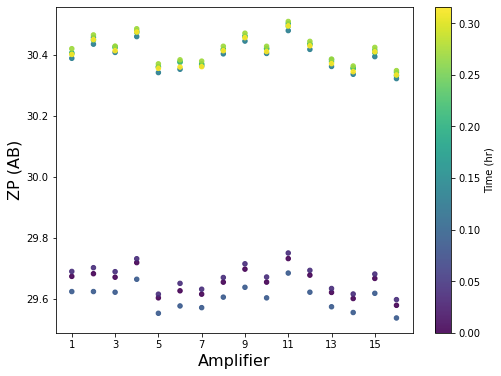

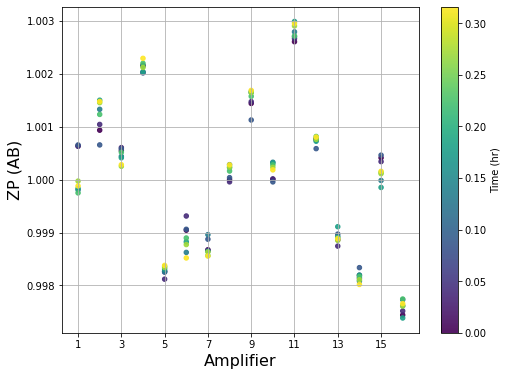

In [91]:
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

## Testing on target 0 from 2022-04-23

In [12]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_1')
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py

In [13]:
%time tr1_output = main(matchstring="*PA.fits",verbose=False)

ZP = 29.669 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_15PA.fits
ZP = 29.685 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_12PA.fits
ZP = 29.655 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_10PA.fits
ZP = 29.674 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_1PA.fits
ZP = 29.608 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_5PA.fits
ZP = 29.686 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_2PA.fits
ZP = 29.723 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_4PA.fits
ZP = 29.583 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_16PA.fits
ZP = 29.601 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_14PA.fits
ZP = 29.620 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_13PA.fits
ZP = 29.673 +/- 0.003, 90Prime.r.2022-04-23T10:19:51.211_3PA.fits
ZP = 29.736 +/- 0.005, 90Prime.r.2022-04-23T10:19:51.211_11PA.fits
ZP = 29.624 +/- 0.004, 90Prime.r.2022-04-23T10:19:51.211_6PA.fits
ZP = 29.614 +/- 0.002, 90Prime.r.2022-04-23T10:19:51.211_7PA.fits
ZP = 29.672 +/- 0.003, 90Prime.r.2022-04-23T10:22:12.645_10PA.fits
ZP

In [16]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr1_output)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)

SyntaxError: f-string: expecting '}' (BOK_norm_amps.py, line 66)

NameError: name 'int' is not defined

In [4]:
os.chdir('/media/rfinn/hdata/BOK2022Apr/20220423/target-r_0')
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py


In [6]:
%time tr0_output = main(matchstring="*PA.fits",verbose=False)

ZP = 30.382 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_13PA.fits
ZP = 30.360 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_5PA.fits
ZP = 30.494 +/- 0.009, 90Prime.r.2022-04-23T07:54:51.897_4PA.fits
ZP = 30.354 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_14PA.fits
ZP = 30.422 +/- 0.004, 90Prime.r.2022-04-23T07:54:51.897_1PA.fits
ZP = 30.436 +/- 0.005, 90Prime.r.2022-04-23T07:54:51.897_3PA.fits
ZP = 30.421 +/- 0.005, 90Prime.r.2022-04-23T07:54:51.897_15PA.fits
ZP = 30.474 +/- 0.006, 90Prime.r.2022-04-23T07:54:51.897_11PA.fits
ZP = 30.443 +/- 0.008, 90Prime.r.2022-04-23T07:54:51.897_2PA.fits
ZP = 30.353 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_16PA.fits
ZP = 30.426 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_12PA.fits
ZP = 30.424 +/- 0.002, 90Prime.r.2022-04-23T07:54:51.897_10PA.fits
ZP = 30.385 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_6PA.fits
ZP = 30.421 +/- 0.004, 90Prime.r.2022-04-23T07:54:51.897_8PA.fits
ZP = 30.373 +/- 0.003, 90Prime.r.2022-04-23T07:54:51.897_7PA.fits
ZP 

10
90Prime.r.2022-04-23T08:05:51.243
16 30.419874602069108
90Prime.r.2022-04-23T08:13:11.779
16 30.401711686565342
90Prime.r.2022-04-23T08:03:06.088
16 30.42828659486591
90Prime.r.2022-04-23T08:21:25.953
16 30.401316636590874
90Prime.r.2022-04-23T08:15:56.515
16 30.426033677835612
90Prime.r.2022-04-23T07:54:51.897
16 30.41470013398243
90Prime.r.2022-04-23T08:18:41.282
16 30.423112482259985
90Prime.r.2022-04-23T07:57:36.625
16 30.41087746709912
90Prime.r.2022-04-23T08:10:27.516
16 30.41123316911068
90Prime.r.2022-04-23T08:00:21.342
16 30.419901746189474
10
med/ave offset for chip01 = 1.0002,1.0002
med/ave offset for chip02 = 1.0010,1.0011
med/ave offset for chip03 = 1.0007,1.0007
med/ave offset for chip04 = 1.0025,1.0025
med/ave offset for chip05 = 0.9982,0.9982
med/ave offset for chip06 = 0.9990,0.9990
med/ave offset for chip07 = 0.9987,0.9987
med/ave offset for chip08 = 1.0002,1.0002
med/ave offset for chip09 = 1.0016,1.0015
med/ave offset for chip10 = 1.0003,1.0003
med/ave offset for

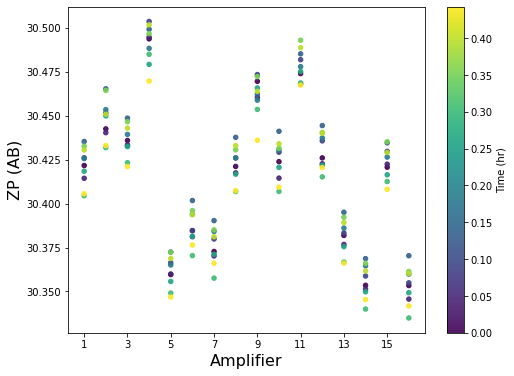

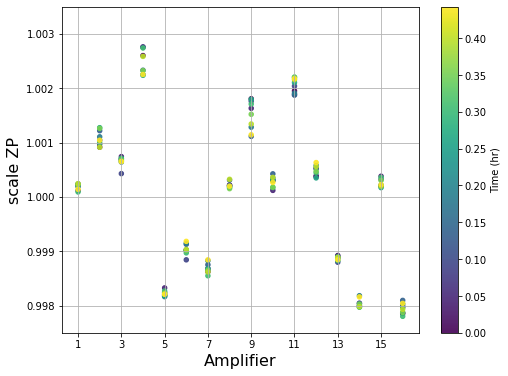

In [11]:
%run ~/github/HalphaImaging/python3/BOK_norm_amps.py
filename,obstime,amp,zp,zperr,prefix,scaled_zp = process_output(tr0_output)
make_plots(filename,obstime,amp,zp,zperr,prefix,scaled_zp)